In [1]:
import json, gzip
from pathlib import Path

import pandas as pd
from ete3 import Tree

from colaml import *
from colaml.misc import dataplot

from myconfig import DATA_DIR, ROOT_DIR
from plotutil import *

In [2]:
%matplotlib inline

In [3]:
recon_path = ROOT_DIR/'results'/'bacteria-lmax2-filt05-mrglrecon.json.gz'

with gzip.open(recon_path) as file:
    tmp = json.load(file)

recon = ReconPhyTable(
    pd.DataFrame(**tmp['recon']).T.to_dict(orient='list'), 
    PostorderSerializedTree(Tree(tmp['tree'], format=3)), 
    otherstates=[
        (other['label'], pd.DataFrame(**other['states']).T.to_dict(orient='list'))
        for other in tmp['otherstates']
    ]
)

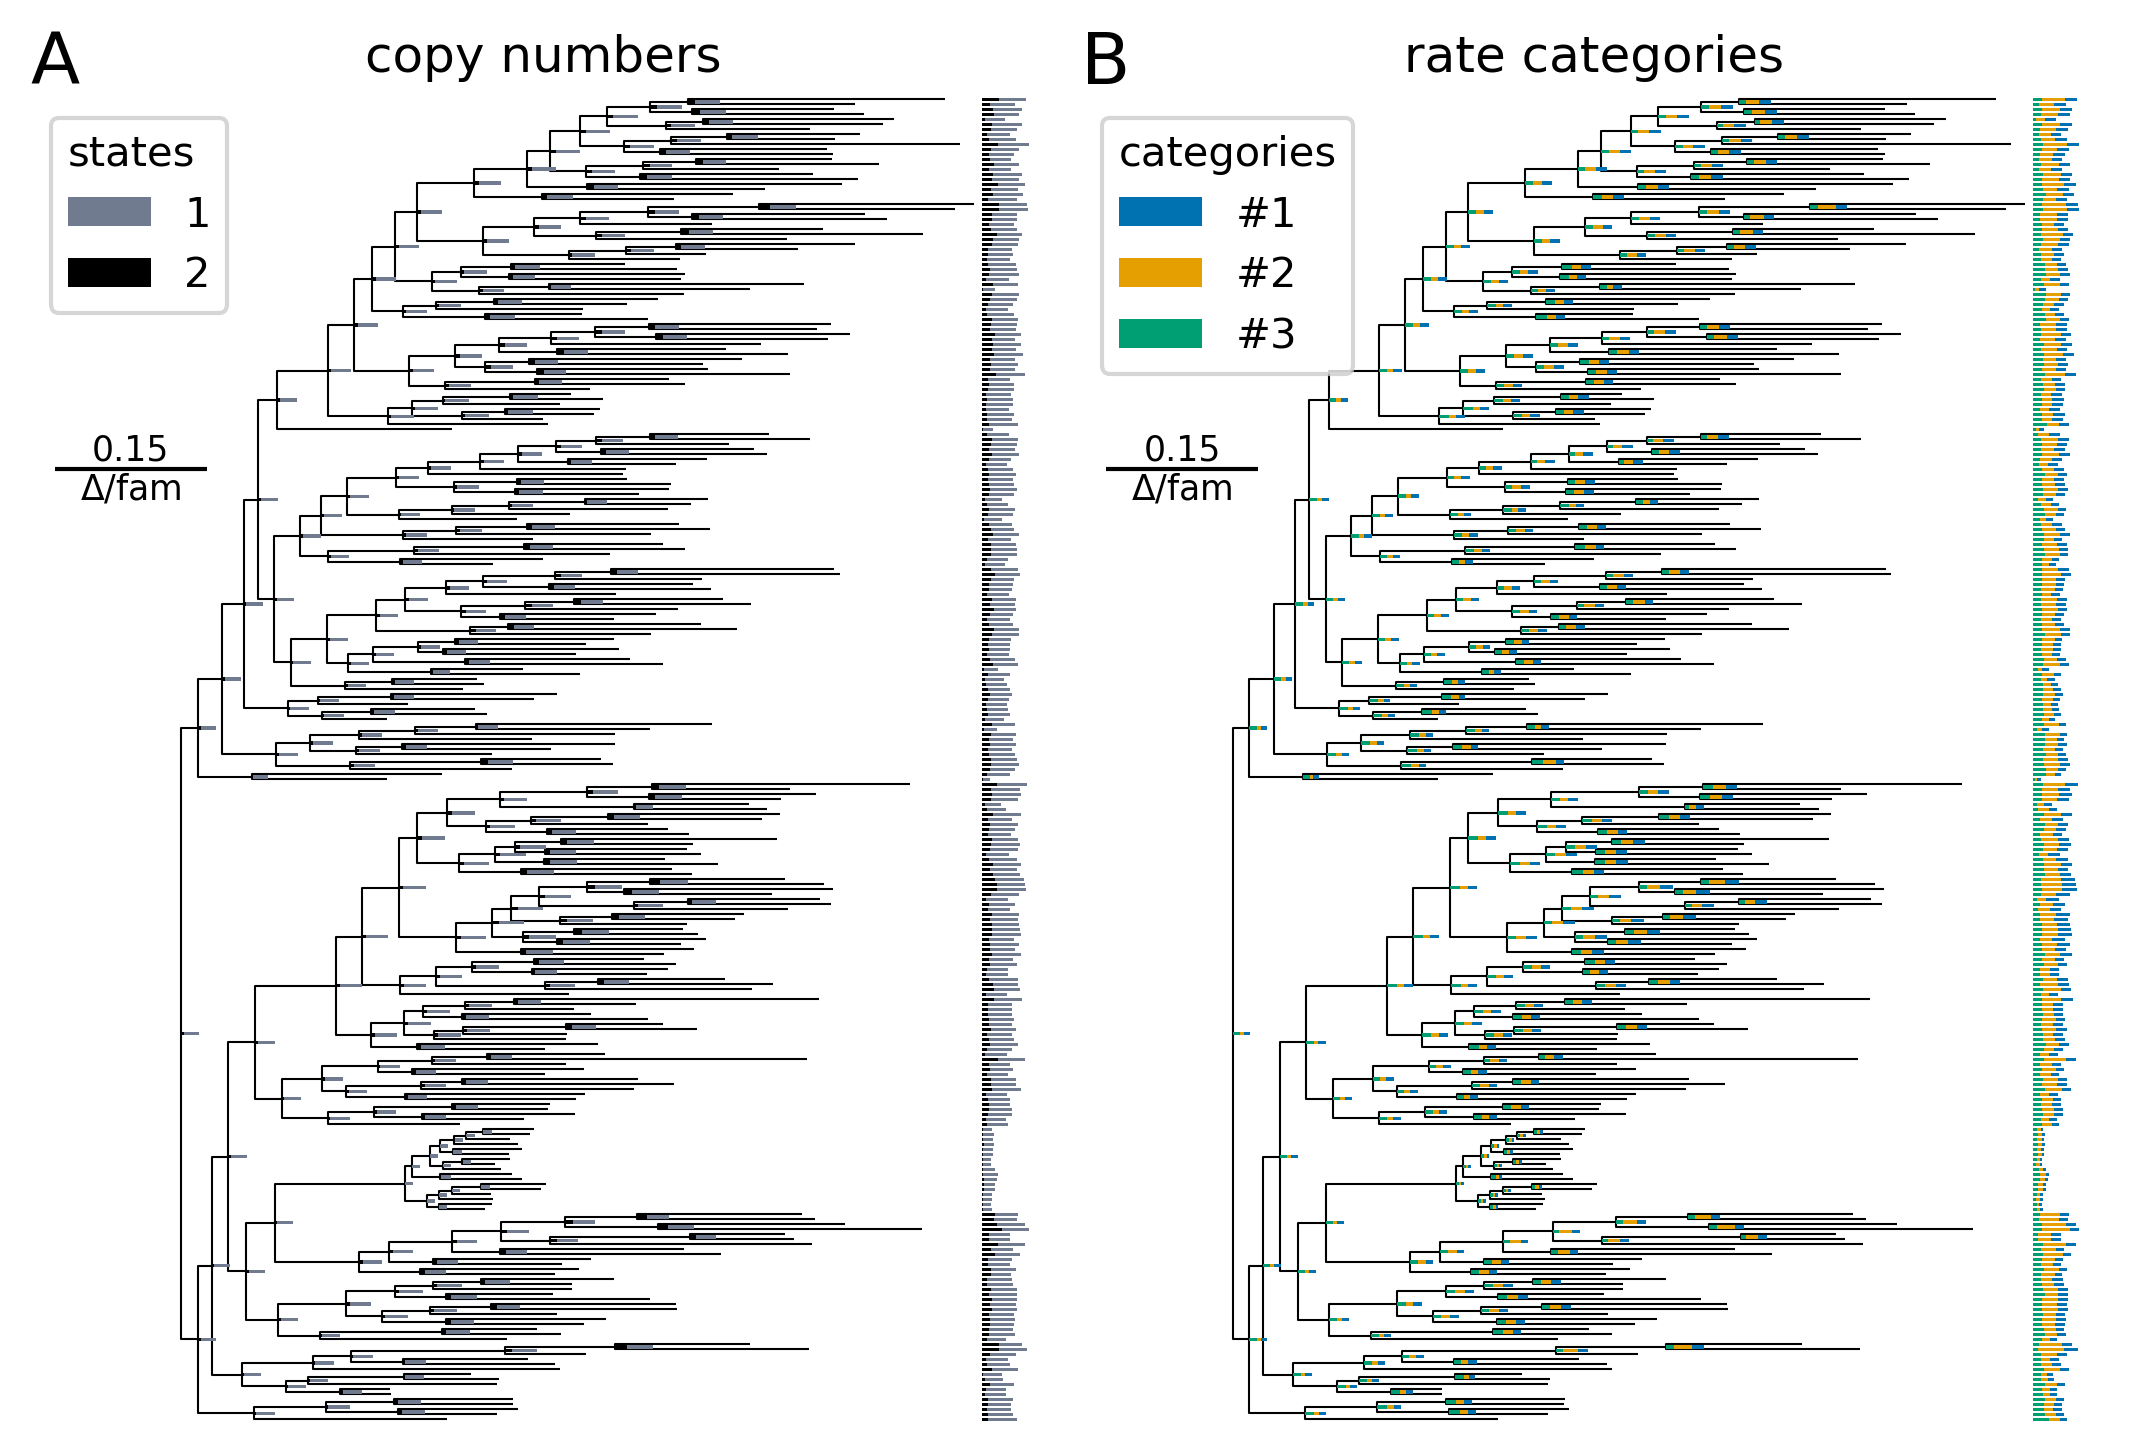

In [4]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(OkabeItoCUDcy.by_key()['color'])

with plt.rc_context({'lines.linewidth': 0.5, 'axes.prop_cycle': OkabeItoCUDcy}):
    fig, (ax0, ax1) = plt.subplots(
        1, 2, figsize=(178*mm, 120*mm), dpi=300, layout='constrained', sharex=True, sharey=True
    )
    dataplot.draw_reconstruction(
        recon, major='states', ax=ax0, horizontal=True, 
        size=(0.8, 0.1)
    )
    ax0.set_title('copy numbers')

    dataplot.draw_reconstruction(
        recon, major='categories', ax=ax1, horizontal=True, cmap_major=cmap, 
        size=(0.8, 0.1)
    )
    for txt in ax1.legend_.get_texts():
        txt.set_text({'0': '#1', '1': '#2', '2': '#3'}.get(txt.get_text(), txt.get_text()))
    ax1.set_title('rate categories')

    for ax in (ax0, ax1):
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
        ax.set_ybound(-0.5, recon.tree.ntips-0.5)

    ax0.text(0, 1.01, 'A', fontsize='xx-large', transform=ax0.transAxes)
    ax1.text(0, 1.01, 'B', fontsize='xx-large', transform=ax1.transAxes)

    for ax in fig.axes:
        ax.hlines(190, -0.125, 0.025, lw=1, color='k')
        ax.margins(x=0.08)
        ax.set_xlim(xmin=-0.15)
        ax.text(-0.05, 190, '0.15\n$\Delta$/fam', ha='center', va='center', fontsize='small')
        
    fig.canvas.draw()
    
fig.savefig('jpg/suppl-recon-bact.jpg', bbox_inches='tight', dpi=350)
fig.savefig('png/suppl-recon-bact.png', bbox_inches='tight', dpi=350)
#fig.savefig('pdf/suppl-recon-bact.pdf', bbox_inches='tight')